# A Demo Straight from [Microsoft VSCode](https://code.visualstudio.com/docs/datascience/data-science-tutorial)

```bash
conda create -n <Name> python<optional-version> <packages> pandas jupyter seaborn scikit-learn keras tensorflow
```

Remember to run the conda init in the folder youre working in to get the option to select the correct interpreter. Might need to run
```bash
python -m ipykernel install --user --name myenv --display-name "Python (myenv)"
```
To get jupyter NB to recognize your kernel

In [1]:
import pandas as pd
import numpy as np
Titanic = pd.read_csv('TitanicData.csv')

In [2]:
Titanic.replace('?', np.nan, inplace= True)
Titanic = Titanic.astype({"age": np.float64, "fare": np.float64})

## Now we use seaborn and matplotlib to view how certain columns of the dataset relate to survivability.
Seaborn providing the different types of plots
And Matplotlib to shorten the dataset

<AxesSubplot:xlabel='survived', ylabel='fare'>

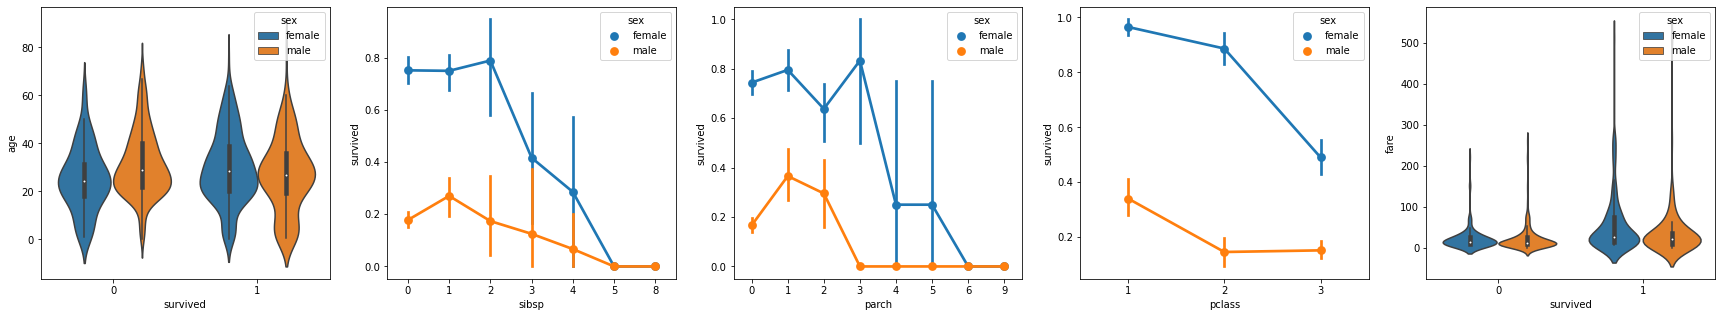

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=Titanic, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=Titanic, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=Titanic, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=Titanic, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=Titanic, ax=axs[4])

In [4]:
Titanic.replace({'male':1, 'female':0}, inplace=True) #? String Genders to numbers
Titanic.corr().abs()[["survived"]] #? Finding coorelation to gender and the rest

Titanic = Titanic[['sex', 'pclass','age','fare','survived']].dropna()

Looking at the correlation results, you'll notice that some variables like gender have a fairly high correlation to survival, while others like relatives (sibsp = siblings or spouse, parch = parents or children) seem to have little correlation.

#CallTheFeministSquad

# Training Machines

For this section you'll use the scikit-learn library (as it offers some useful helper functions) to do pre-processing of the dataset, train a classification model to determine survivability on the Titanic, and then use that model with test data to determine its accuracy.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Titanic[['sex','pclass','age','fare']], Titanic.survived, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7799043062200957
